In [2]:
import pandas as pd
df=pd.DataFrame( )

df=pd.DataFrame({'잠실역 10번 출구':[37.51444, 127.1046],'천호역 6,7번 출구 사이':[37.53821, 127.1244],'길동사거리 버스정류장':[37.53473, 127.1358553],
                '둔촌고등학교':[37.53389, 127.1421048],'자이아파트 정류장':[37.53621, 127.147789],'상일초등학교':[37.54579, 127.1706309],'하남시청 앞':[37.53967, 127.2136],
                  '하남JC':[37.531670,127.197280],'하남IC':[37.525151,127.220275],'동서울TG':[37.514116,127.223344],'산곡JC':[37.489980,127.239243],
                 '경기광주IC':[37.447895,127.269738],'글로벌캠퍼스':[37.337620,127.267800]}).transpose()
df.columns=['위도','경도']
df

,위도,경도
잠실역 10번 출구,37.514440,127.104600
"천호역 6,7번 출구 사이",37.538210,127.124400
길동사거리 버스정류장,37.534730,127.135855
둔촌고등학교,37.533890,127.142105
자이아파트 정류장,37.536210,127.147789
상일초등학교,37.545790,127.170631
하남시청 앞,37.539670,127.213600
하남JC,37.531670,127.197280
하남IC,37.525151,127.220275
동서울TG,37.514116,127.223344


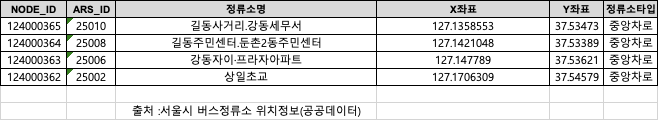

In [6]:
"""
#하교길
#학교를 지나는 중부고속도로 (하남JC-경기광주IC)
cone_df=pd.read_csv("data/콘존.csv",encoding= 'cp949')
cone_df=cone_df[cone_df['콘존명'].isin(['하남IC-하남JC','동서울TG-하남IC','산곡JC-동서울TG','경기광주IC-산곡JC'])]
cone_df
#-> 콘존ID, 노드 ID 달라짐
"""

#학교를 지나는 중부고속도로 (하남JC-경기광주IC)
cone_df=pd.read_csv("data/콘존.csv",encoding= 'cp949')
cone_df=cone_df[cone_df['콘존명'].isin(['하남JC-하남IC','하남IC-동서울TG','동서울TG-산곡JC','산곡JC-경기광주IC'])]
cone_df

,콘존ID,콘존길이,기점종점방향구분코드,시작노드ID,종료노드ID,차로수,노선번호,제한속도,노선구성순번,콘존명,버스전용차로유무,도로등급구분코드
788,0352CZS400,4940.0,S,0265,0255,2.0,352,110.0,4.0,산곡JC-경기광주IC,0,101
789,0352CZS410,4230.0,S,0475,0265,4.0,352,110.0,3.0,동서울TG-산곡JC,0,101
790,0352CZS420,1000.0,S,0260,0475,4.0,352,110.0,2.0,하남IC-동서울TG,0,101
791,0352CZS430,2390.0,S,0253,0260,4.0,352,110.0,1.0,하남JC-하남IC,0,101


In [7]:
cone_df2=cone_df[['콘존ID','콘존길이','시작노드ID','종료노드ID','차로수','콘존명']]
cone_df2.rename(columns={'콘존명': '구간명'}, inplace=True)
cone_df2

/var/folders/nm/26yk90l550xc1ln38d9jn04r0000gn/T/ipykernel_39384/3043087786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cone_df2.rename(columns={'콘존명': '구간명'}, inplace=True)


,콘존ID,콘존길이,시작노드ID,종료노드ID,차로수,구간명
788,0352CZS400,4940.0,0265,0255,2.0,산곡JC-경기광주IC
789,0352CZS410,4230.0,0475,0265,4.0,동서울TG-산곡JC
790,0352CZS420,1000.0,0260,0475,4.0,하남IC-동서울TG
791,0352CZS430,2390.0,0253,0260,4.0,하남JC-하남IC


In [4]:
node_df=pd.read_csv('data/노드 위도 경도.csv',encoding='utf-8')
node_df


,콘존ID,시작 노드명,시작 노드 위도,시작 노드 경도,끝 노드명,끝 노드 위도,끝 노드 경도
0,0352CZE400,경기광주IC,37.447895,127.269738,산곡JC,37.489980,127.239243
1,0352CZS400,산곡JC,37.489980,127.239243,경기광주IC,37.447895,127.269738
2,0352CZS410,동서울TG,37.514116,127.223344,산곡JC,37.489980,127.239243
3,0352CZE410,산곡JC,37.489980,127.239243,동서울TG,37.514116,127.223344
4,0352CZS420,하남IC,37.525151,127.220275,동서울TG,37.514116,127.223344
5,0352CZE420,동서울TG,37.514116,127.223344,하남IC,37.525151,127.220275
6,0352CZE430,하남IC,37.525151,127.220275,하남JC,37.531670,127.197280
7,0352CZS430,하남JC,37.531670,127.197280,하남IC,37.525151,127.220275


In [5]:
import folium

m = folium.Map(location=[37.43967, 127.2136], zoom_start=10.4)

for i in range(df.shape[0]):
    #위도
    latitude=df.iloc[i,0]

    #경도
    longitude=df.iloc[i,1]

    #마커 표시
    folium.Marker([latitude, longitude],
                  popup=f"한국외대 {df.index[i]}",
                  tooltip=f"{df.index[i]}").add_to(m)

m

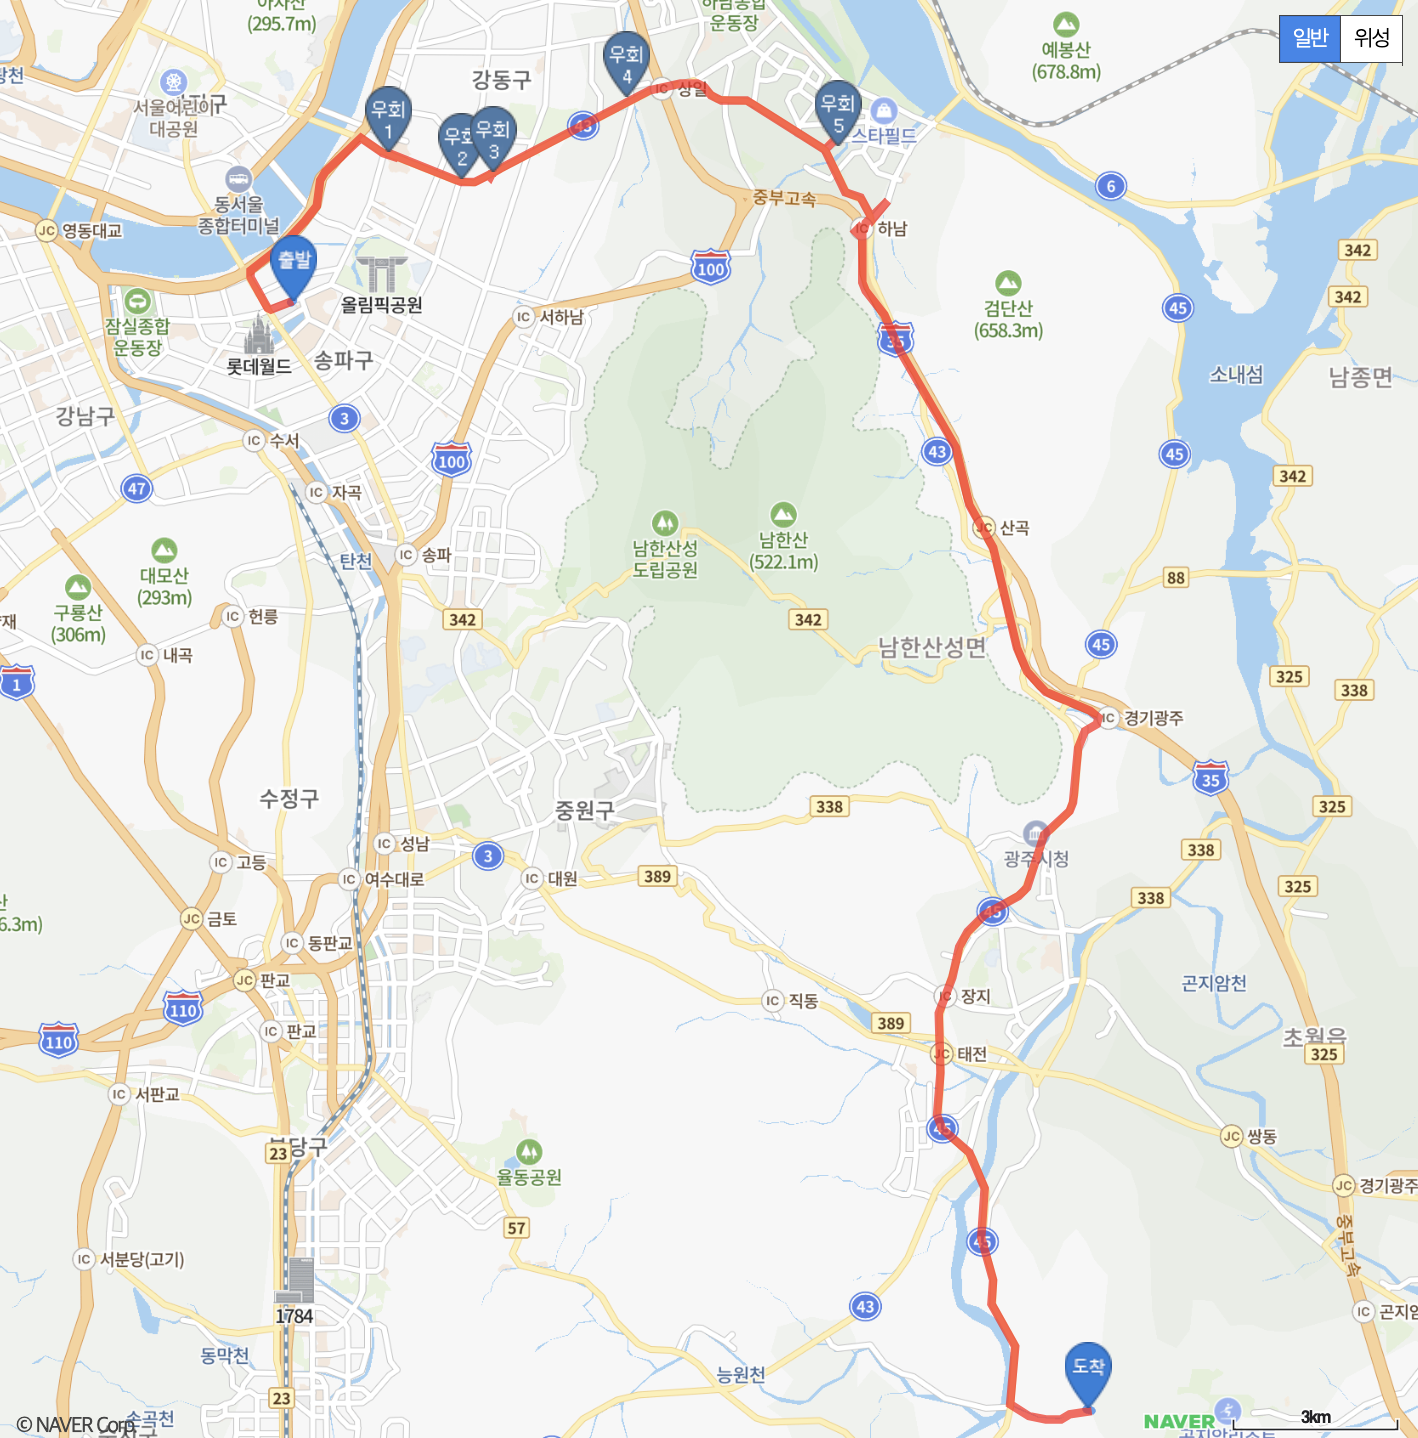